### Key Concepts in Time Series Concepts

Time series analysis involves examining data points collected or recorded at regular intervals over time to uncover underlying patterns and relationships. Below is a detailed explanation of critical concepts and techniques in time series, including moving averages, autocorrelation, and autoregressive models.

---

### **1. Simple Moving Average (SMA)**

- **Definition**: SMA is the unweighted mean of a specified number of past observations. It smooths a time series by reducing short-term fluctuations, revealing trends.

- **Example**: A 5-day SMA for stock prices averages the prices of the last 5 days.

- **Use Case**: Commonly used in financial markets for trend analysis.

---

### **2. Cumulative Moving Average (CMA)**

- **Definition**: CMA calculates the average of all data points up to the current point. Each new data point contributes to the moving average, making it progressively smoother as more data is included.

- **Example**: Average temperature over time, recalculated each day with new data.

- **Use Case**: Useful for understanding the overall trend from the beginning of the dataset.

---

### **3. Exponential Weighted Moving Average (EWMA)**

- **Definition**: EWMA assigns exponentially decreasing weights to older observations, giving more importance to recent data. This makes it more responsive to changes in the data.

- **Example**: Tracking the latest trends in sales data while retaining historical influence.

- **Use Case**: Used in anomaly detection, financial analysis, and forecasting.

---

### **4. Moving Average and Autocorrelation Function (ACF)**

- **Definition of ACF**: ACF measures the correlation between a time series and its lagged versions over varying time intervals (lags). It helps identify patterns like seasonality or repeated cycles.
  
- **Role of Moving Average in ACF**:
  - **Smoothing**: Moving averages can reduce noise in the series before calculating ACF.
  - **Lag Identification**: Peaks in the ACF plot indicate significant lags that can guide model selection.

- **Example**: ACF for daily stock prices may reveal weekly seasonality.

---

### **5. Autoregressive Model and Partial Autocorrelation Function (PACF)**

#### **Autoregressive (AR) Model**
- **Definition**: An AR model predicts the value of a time series based on its own past values. It assumes a linear relationship between current and lagged observations.

- **Example**: Predicting tomorrow's temperature based on the last 7 days.

- **Use Case**: Ideal for stationary time series.

#### **Partial Autocorrelation Function (PACF)**
- **Definition**: PACF measures the correlation between a time series and its lagged values, after accounting for the correlations explained by intermediate lags.
- **Role in AR Models**:
  - Determines the optimal lag order (\(p\)) for an AR model.
  - The PACF plot shows a sharp cutoff after \(p\) significant lags.

- **Example**: In a PACF plot, a significant spike at lag 2 indicates that an AR(2) model is appropriate.

---

### **Additional Relevant Concepts**

#### **1. Decomposition**
- **Definition**: Decomposing a time series separates it into components:
  - **Trend**: Long-term movement.
  - **Seasonality**: Repeating patterns.
  - **Residual**: Noise or randomness.
- **Use Case**: Understanding and modeling the data better.

---

#### **2. Stationarity**
- **Definition**: A stationary time series has constant mean, variance, and autocorrelation over time.
- **Importance**: Stationarity is essential for ARIMA and related models.
- **Tests**: Augmented Dickey-Fuller (ADF) test.

---

#### **3. Differencing**
- **Definition**: A technique to transform non-stationary data into stationary by subtracting consecutive observations.

- **Use Case**: Prepares data for ARIMA modeling.

---

#### **4. Seasonality and Cyclic Patterns**
- **Seasonality**: Fixed periodic fluctuations (e.g., monthly sales peaks).
- **Cyclic**: Fluctuations without a fixed period (e.g., business cycles).

---

### **Summary**
- **Moving Averages**: Smoothing techniques (SMA, CMA, EWMA) for trend detection.
- **ACF and PACF**: Tools for understanding correlations and selecting lag orders for AR models.
- **Autoregressive Models**: Predict future values based on past data.
- **Decomposition and Stationarity**: Essential preprocessing steps for effective analysis and forecasting.

By combining these techniques, you can analyze, interpret, and forecast time series data with precision.

In [1]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
import yfinance as yf
df_tesla = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


### Simple Moving Average

In [3]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


<Axes: xlabel='Date'>

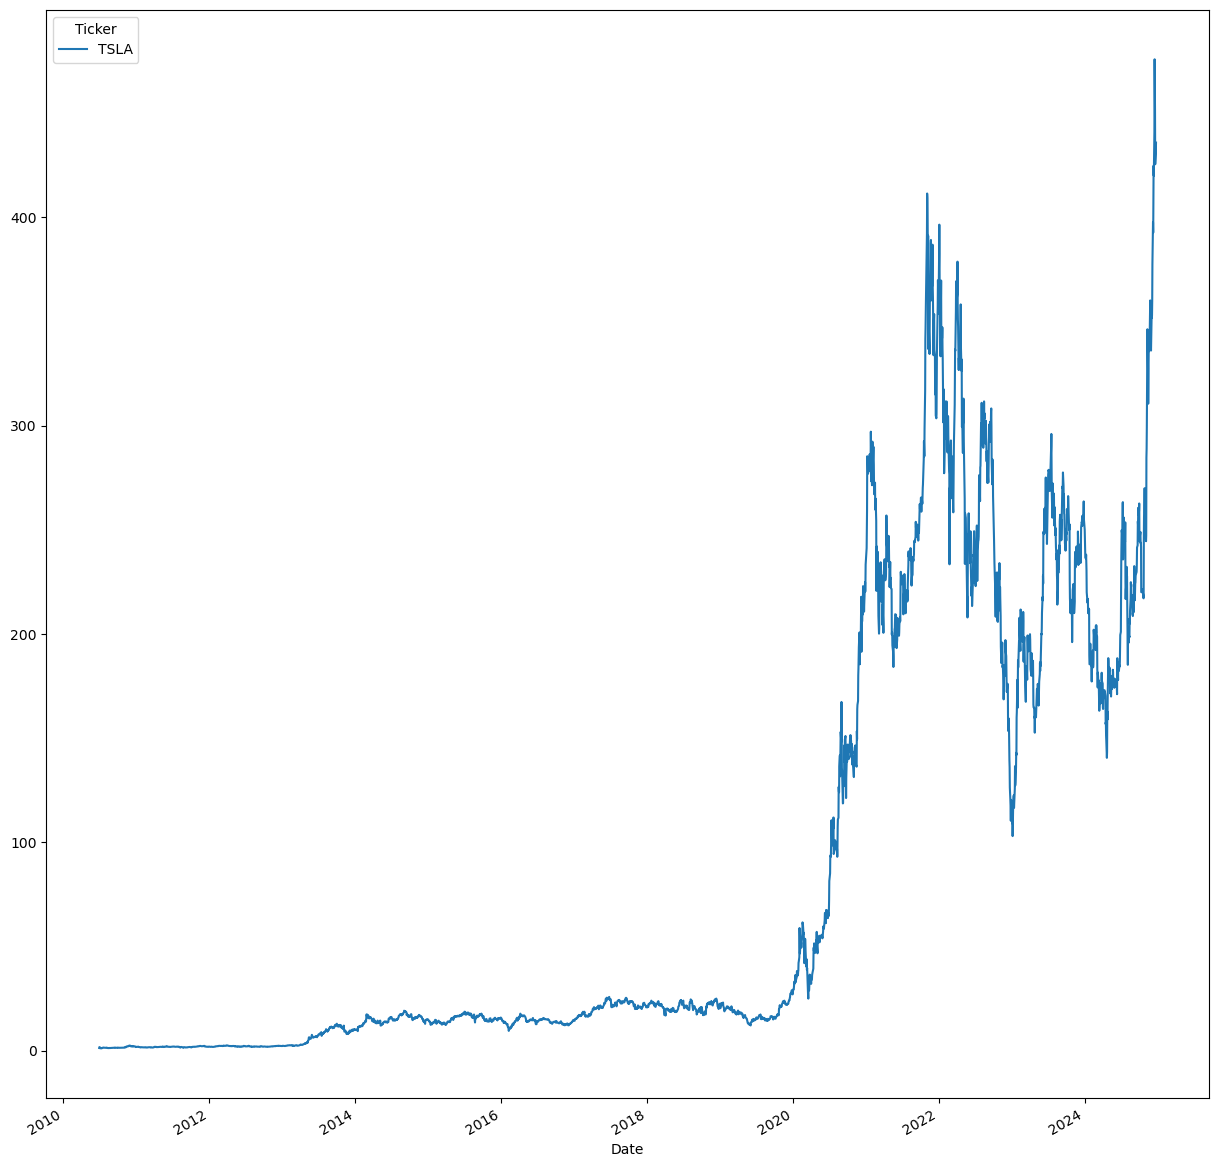

In [4]:
df_tesla['Open'].plot(figsize = (15, 16))

# Now let's a simple moving average from the above graph.

### **`window` and `min_periods` in Simple Moving Average (SMA)**

The **Simple Moving Average (SMA)** in Python, typically implemented using pandas, relies on two key parameters: **`window`** and **`min_periods`**. These parameters control how the moving average is computed.

---

### **1. Window**

- **Definition**: 
  The `window` parameter specifies the number of data points to include in each calculation of the moving average.

- **How It Works**:
  - For each position in the time series, SMA calculates the average of the most recent `window` data points.
  - The size of the `window` determines how smooth the resulting average will be:
    - A **larger window** smooths the data more, capturing broader trends.
    - A **smaller window** is more responsive to short-term fluctuations.

  - The SMA starts producing values from the third data point, averaging over the past three values.

---

### **2. Min Periods**

- **Definition**: 
  The `min_periods` parameter specifies the minimum number of data points required within the window for the SMA calculation.

- **How It Works**:
  - If fewer than `min_periods` data points are available within the window, the result for that position is `NaN`.
  - By default, `min_periods` equals the `window` size, meaning the SMA will not be calculated until the full window is available.

- **Customization**:
  - You can set `min_periods` to a value smaller than the `window` size to allow calculations with fewer data points.
  - This is especially useful for handling missing data or for generating SMA values earlier in the series.

  - Here, SMA with `min_periods=2` starts producing values earlier, as it calculates the average when at least 2 data points are present.

---

### **Key Differences Between `window` and `min_periods`**
| **Parameter**   | **Purpose**                                                                 | **Default Behavior**         |
|------------------|-----------------------------------------------------------------------------|-------------------------------|
| `window`        | Defines the number of data points used in each average calculation.         | Must be specified explicitly. |
| `min_periods`   | Specifies the minimum number of data points required to compute a value.    | Equals `window` by default.   |

---

### **Use Cases**
- **Large Window with Default `min_periods`**:
  Use when analyzing long-term trends and you want accurate calculations only after the window is fully populated.
- **Custom `min_periods`**:
  Use when working with incomplete data or when you need early insights from fewer data points.

In [5]:
df_tesla['Open:10 days rollling'] = df_tesla['Open'].rolling(window = 10, min_periods=1).mean()

In [6]:
df_tesla['Open:10 days rollling']

Date
2010-06-29      1.266667
2010-06-30      1.493000
2010-07-01      1.550889
2010-07-02      1.546500
2010-07-06      1.503867
                 ...    
2024-12-18    416.560999
2024-12-19    425.762000
2024-12-20    430.570999
2024-12-23    433.910001
2024-12-24    438.232001
Name: Open:10 days rollling, Length: 3648, dtype: float64

<Axes: xlabel='Date'>

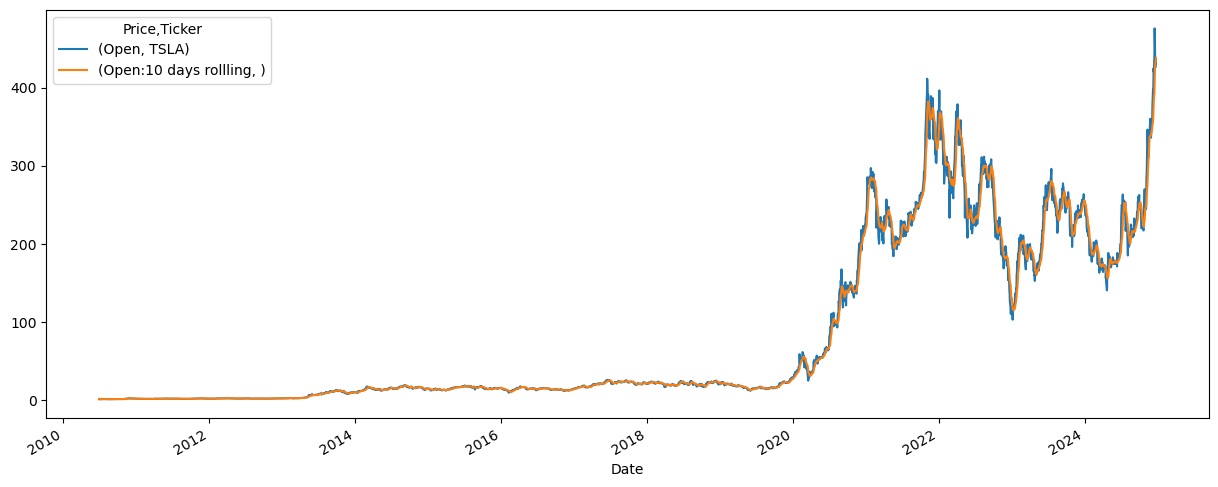

In [7]:
df_tesla[['Open', 'Open:10 days rollling']].plot(figsize=(15,6))

### Let's add x limit for a better visual.

<Axes: xlabel='Date'>

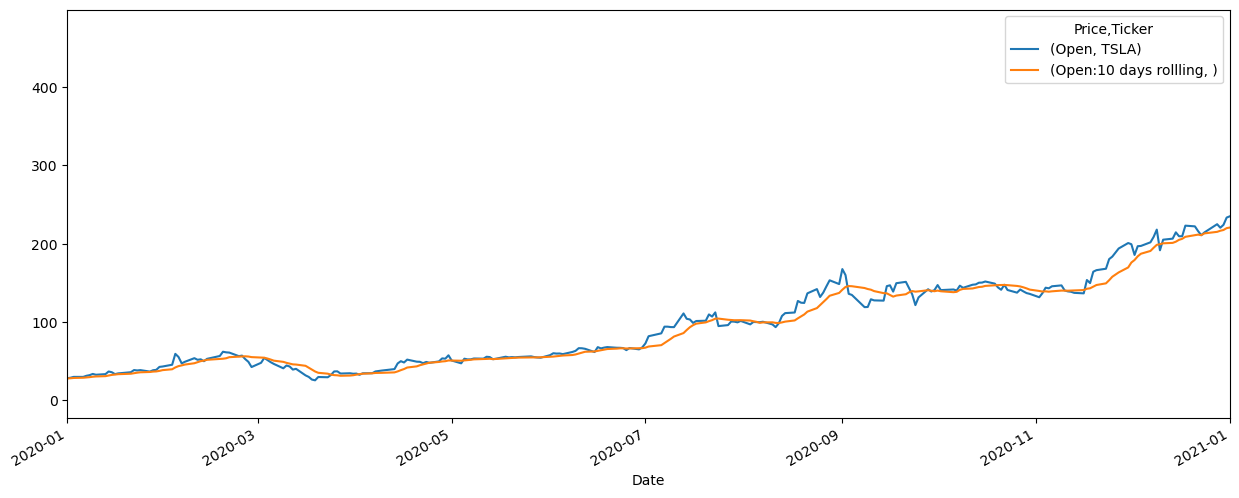

In [8]:
df_tesla[['Open', 'Open:10 days rollling']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize=(15,6))

### Let's do for 30 roling windows

In [9]:
df_tesla['Open:30 days rollling'] = df_tesla['Open'].rolling(window = 30, min_periods=1).mean()
df_tesla['Open:50 days rollling'] = df_tesla['Open'].rolling(window = 50, min_periods=1).mean()

<Axes: xlabel='Date'>

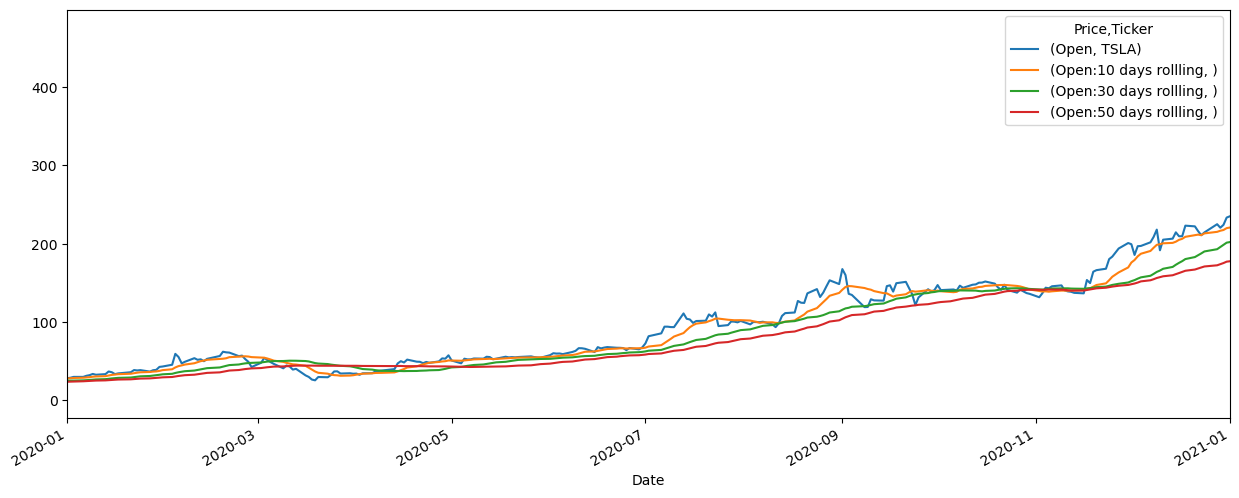

In [10]:
df_tesla[['Open', 'Open:10 days rollling', 'Open:30 days rollling', 'Open:50 days rollling']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize=(15,6))

### we can see that `10 Simple moving average` seams to be more closer to the actual price.

### **Disadvantages of Simple Moving Average (SMA) in Time Series Analysis**

While the Simple Moving Average (SMA) is a straightforward and widely used method for smoothing time series data, it comes with several limitations:

---

### **1. Equal Weighting of Data Points**
- **Explanation**: 
  SMA gives equal weight to all data points within the window. For example, the oldest and most recent values in the window contribute equally to the average.
- **Disadvantage**: 
  This can be problematic in time series where more recent observations are more relevant than older ones (e.g., stock price trends).

---

### **2. Lagging Indicator**
- **Explanation**: 
  SMA is inherently a lagging measure because it relies on past data. The resulting curve is always behind the actual trend.
- **Disadvantage**: 
  In rapidly changing or volatile time series, the SMA may fail to capture sudden shifts or trends in real-time.

---

### **3. Limited Sensitivity to Recent Changes**
- **Explanation**: 
  Due to the fixed window size, SMA responds slowly to abrupt changes, especially when the window size is large.
- **Disadvantage**: 
  This can lead to delayed signals for trend identification, making SMA less suitable for real-time decision-making.

---

### **4. Sensitivity to Window Size**
- **Explanation**: 
  The choice of window size significantly impacts the SMA. A small window can lead to noisy results, while a large window can oversmooth the data, obscuring important patterns.
- **Disadvantage**: 
  Selecting the "correct" window size is often subjective and requires experimentation, making SMA less robust.

---

### **5. Ignores Long-Term Dependencies**
- **Explanation**: 
  SMA only considers the data within the window, ignoring any relationships or patterns outside of it.
- **Disadvantage**: 
  This makes SMA unsuitable for capturing long-term dependencies in time series data, such as seasonality or recurring patterns.

---

### **6. Not Robust to Missing Data**
- **Explanation**: 
  SMA requires at least `min_periods` data points within the window for calculation. Missing data points can disrupt the computation, leading to gaps (NaN values) in the results.
- **Disadvantage**: 
  This can complicate analysis when working with incomplete or noisy datasets.

---

### **Alternatives to Overcome SMA Limitations**
To address these drawbacks, you might consider:
- **Exponential Moving Average (EMA)**: Assigns more weight to recent observations, making it more responsive to changes.
- **Cumulative Moving Average (CMA)**: Considers all data up to each point, useful for smoothing without a fixed window.
- **Weighted Moving Average (WMA)**: Allows you to assign varying weights to observations based on importance.

# Cummulative Moving Average

Let's start with **expanding()** method.

<Axes: xlabel='Date'>

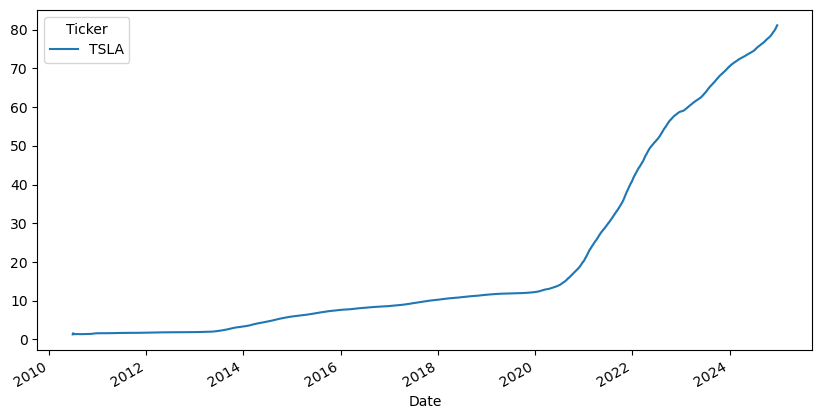

In [13]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

# Exponential Weighted Moving Average

We'll start with `ewm` = **Exponential Moving Average**

In [16]:
# EMA Tesla shares

df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha = 0.1, adjust = False).mean()

<Axes: xlabel='Date'>

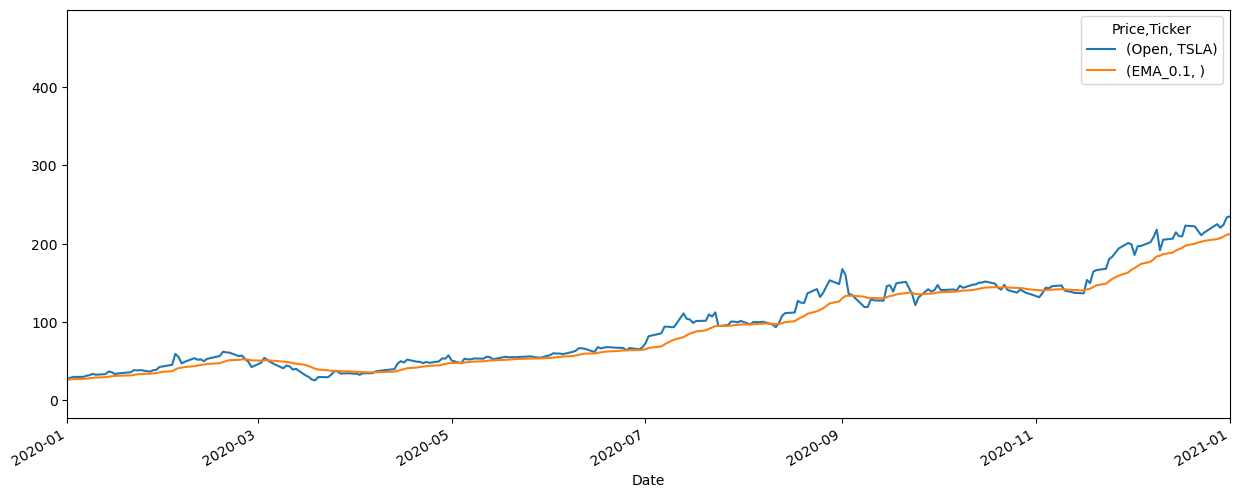

In [18]:
df_tesla[['Open','EMA_0.1']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize=(15,6))

In [19]:
# EMA Tesla shares

df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha = 0.3, adjust = False).mean()

<Axes: xlabel='Date'>

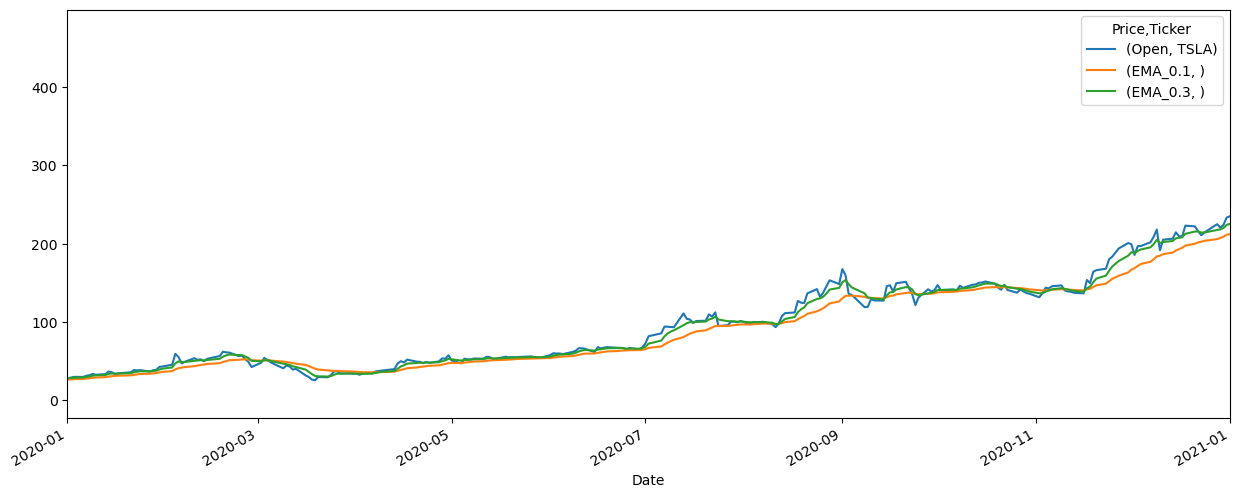

In [22]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize=(15,6))

### We can implement ewma using `span`

In [23]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

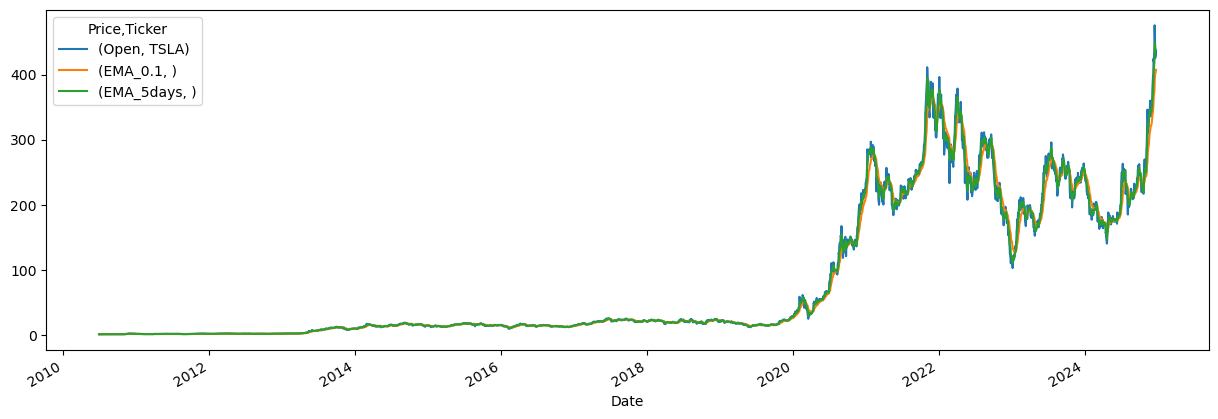

In [24]:
df_tesla[['Open', 'EMA_0.1', 'EMA_5days']].plot(figsize=(15,5))

# **Introduction to the Moving Average Model (MA) in Time Series**

The **Moving Average (MA) model** is one of the fundamental techniques in time series analysis, used to model and predict time-dependent data. Unlike the simple smoothing methods like the Simple Moving Average (SMA), the MA model is a statistical model that accounts for the relationship between past forecast errors and the current observation.

---

### **What is a Moving Average Model?**
The Moving Average model expresses the value of a time series as a linear combination of past random shocks (errors). It assumes that the observed data depends not on its own past values but on past errors, making it suitable for handling noise in the data.

---

### **Key Features of the MA Model**
1. **Error-Driven**: 
   The MA model relies on past error terms (\( \epsilon_t \)) rather than past observations to predict current values.
   
2. **Short Memory**:
   Only a limited number of past errors, determined by the order \( q \), are used in the model. This makes the MA model particularly useful for time series with short-term dependencies.

3. **Noise Reduction**:
   By focusing on random shocks, the MA model can smooth out noise in the data, making patterns easier to identify.

---

### **When to Use an MA Model?**
- **Noise-Driven Time Series**: When the data shows random fluctuations that can be modeled as the result of past shocks.
- **Stationary Data**: The MA model works best with stationary time series (i.e., series with a constant mean and variance).
- **Short-Term Dependencies**: If autocorrelation in the data diminishes quickly (e.g., after a lag of 2 or 3), an MA model is a good fit.

---

### **Advantages of the MA Model**
- **Simplicity**: Straightforward to implement and interpret.
- **Effective for Noise**: Handles random noise better than models like the Simple Moving Average.
- **Short-Term Focus**: Useful when recent errors have a more significant impact than older ones.

---

### **Limitations of the MA Model**
- **Stationarity Requirement**: The data must be stationary, requiring preprocessing for non-stationary time series.
- **Limited Memory**: The model does not capture long-term dependencies, making it unsuitable for series with complex patterns.
- **Order Selection**: Choosing the correct order \( q \) can be challenging and often requires trial and error or model selection criteria like AIC/BIC.

---

### **Relation to Other Models**
- **Autoregressive Models (AR)**: While the MA model relies on past errors, AR models depend on past values of the series itself.
- **ARIMA Models**: The MA model is often combined with AR and integrated (I) components to form the ARIMA model for more complex time series.

---

### **Applications of the MA Model**
- **Financial Forecasting**: Modeling noise in stock prices and returns.
- **Weather Prediction**: Smoothing and predicting short-term fluctuations.
- **Demand Forecasting**: Handling noise in sales or demand data for inventory planning.

---

The Moving Average model is a versatile tool in time series analysis, especially for data characterized by short-term dependencies and random shocks. By understanding its assumptions and limitations, analysts can effectively use it to uncover meaningful insights and make accurate predictions.